#Instituto Tecnológico y de Estudios Superiores de Monterrey
#Reto 1: Limpieza, análisis, visualización y kmeans
Arturo Eduardo Loperena GutierrezA01793641

Karla Daniela Valenzuela Gomez A00819192

In [58]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import math 
import matplotlib.pyplot as plt
import requests, zipfile 
from io import BytesIO
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from google.colab import drive
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import QuantileTransformer 
from sklearn.preprocessing import power_transform 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from shapely.geometry import Point
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(url)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
df_sub=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [60]:
df = df_sub

In [61]:
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [62]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [64]:
df.shape

(1068, 57)

In [65]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [66]:
df.isna().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [67]:
columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

In [68]:
new_df = df[columnas_numericas]

In [69]:
new_df

,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,NaN,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,NaN,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,NaN,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,NaN,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,NaN,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,NaN,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,256.000,529.0,NaN,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,330.690,2600.0,NaN,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,193.140,873.0,NaN,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


In [70]:
for i in columnas_numericas:
  print('Valores unicos', new_df[i].value_counts())

Valores unicos 157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
Valores unicos 777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
Valores unicos Series([], Name: SDT_mg/L, dtype: int64)
Valores unicos 496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64
Valores unicos <0.2      162
0.466       3
0.5202      3
0.4993      2
0.482       2
         ... 
1.6185      1
0.6045      1
0.7042      1
0.4343      1
0.4002      1
Name: FLUORUROS_mg/L, Length: 862, dtype: int64
Valores unicos <20        26
121.512     6
53.8542     4
109.56      4
428.27      3
           ..
51.454      1
103         1
24.8

In [71]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   object 
 4   FLUORUROS_mg/L       1068 non-null   object 
 5   DUR_mg/L             1067 non-null   object 
 6   COLI_FEC_NMP/100_mL  1068 non-null   object 
 7   N_NO3_mg/L           1067 non-null   object 
 8   AS_TOT_mg/L          1068 non-null   object 
 9   CD_TOT_mg/L          1068 non-null   object 
 10  CR_TOT_mg/L          1068 non-null   object 
 11  HG_TOT_mg/L          1068 non-null   object 
 12  PB_TOT_mg/L          1068 non-null   object 
 13  MN_TOT_mg/L          1068 non-null   object 
 14  FE_TOT_mg/L          1068 non-null   object 
dtypes: float64(3), object(12)
memory usage

In [72]:
for i in columnas_numericas:
  new_df[i] = new_df[i].astype('str')
  new_df[i] = new_df[i].str.replace('<0.2','0.2')
  new_df[i] = new_df[i].str.replace('<20','20')
  new_df[i] = new_df[i].str.replace('<1.1','1.1')
  new_df[i] = new_df[i].str.replace('<0.02','0.02')
  new_df[i] = new_df[i].str.replace('<0.01','0.01')
  new_df[i] = new_df[i].str.replace('<0.003','0.003')
  new_df[i] = new_df[i].str.replace('<0.005','0.005')
  new_df[i] = new_df[i].str.replace('<0.0005','0.0005')
  new_df[i] = new_df[i].str.replace('<0.0015','0.0015')
  new_df[i] = new_df[i].str.replace('<0.025','0.025')
  new_df[i] = new_df[i].str.replace('<25','25')
  new_df[i] = new_df[i].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [73]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(15)
memory usage: 125.3 KB


In [74]:
new_df.drop('SDT_mg/L', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [75]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


In [76]:
y = pd.DataFrame(df['SEMAFORO'])

In [77]:
y.value_counts()

SEMAFORO
Verde       434
Rojo        387
Amarillo    247
dtype: int64

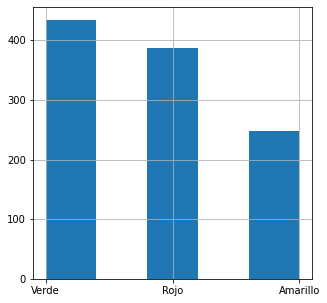

In [78]:
y['SEMAFORO'].hist(bins = 5, figsize=(5,5))

In [79]:
y

,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo
...,...
1063,Rojo
1064,Rojo
1065,Rojo
1066,Verde


In [80]:
new_df.corr()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
ALC_mg/L,1.000000,0.232003,0.079350,0.069056,0.243177,-0.016449,-0.000394,0.073299,0.032686,-0.014282,0.067195,0.015064,0.129866,0.043423
CONDUCT_mS/cm,0.232003,1.000000,0.286555,-0.025200,0.693146,0.017808,0.219512,-0.003722,0.029040,0.004412,0.059093,0.024083,0.095955,0.083181
SDT_M_mg/L,0.079350,0.286555,1.000000,-0.013798,0.347205,-0.001133,0.101706,-0.010157,0.010800,-0.000682,0.015114,-0.005552,0.018927,0.020104
FLUORUROS_mg/L,0.069056,-0.025200,-0.013798,1.000000,-0.149691,0.003564,-0.019782,0.444079,-0.015123,-0.005242,-0.026358,-0.032236,-0.049742,-0.009994
DUR_mg/L,0.243177,0.693146,0.347205,-0.149691,1.000000,0.031727,0.301468,-0.106498,0.025002,0.007438,0.064839,-0.018908,0.083822,0.059775
COLI_FEC_NMP/100_mL,-0.016449,0.017808,-0.001133,0.003564,0.031727,1.000000,-0.000969,0.038151,-0.001656,-0.008840,-0.007661,0.022510,-0.005326,0.003045
N_NO3_mg/L,-0.000394,0.219512,0.101706,-0.019782,0.301468,-0.000969,1.000000,-0.008019,-0.009362,-0.015131,0.014912,-0.016529,-0.036854,0.013298
AS_TOT_mg/L,0.073299,-0.003722,-0.010157,0.444079,-0.106498,0.038151,-0.008019,1.000000,-0.009078,-0.009582,-0.009939,-0.023057,0.016916,0.014295
CD_TOT_mg/L,0.032686,0.029040,0.010800,-0.015123,0.025002,-0.001656,-0.009362,-0.009078,1.000000,-0.001781,-0.004083,-0.002875,-0.004205,-0.001036
CR_TOT_mg/L,-0.014282,0.004412,-0.000682,-0.005242,0.007438,-0.008840,-0.015131,-0.009582,-0.001781,1.000000,0.005866,-0.001895,-0.005087,0.000629


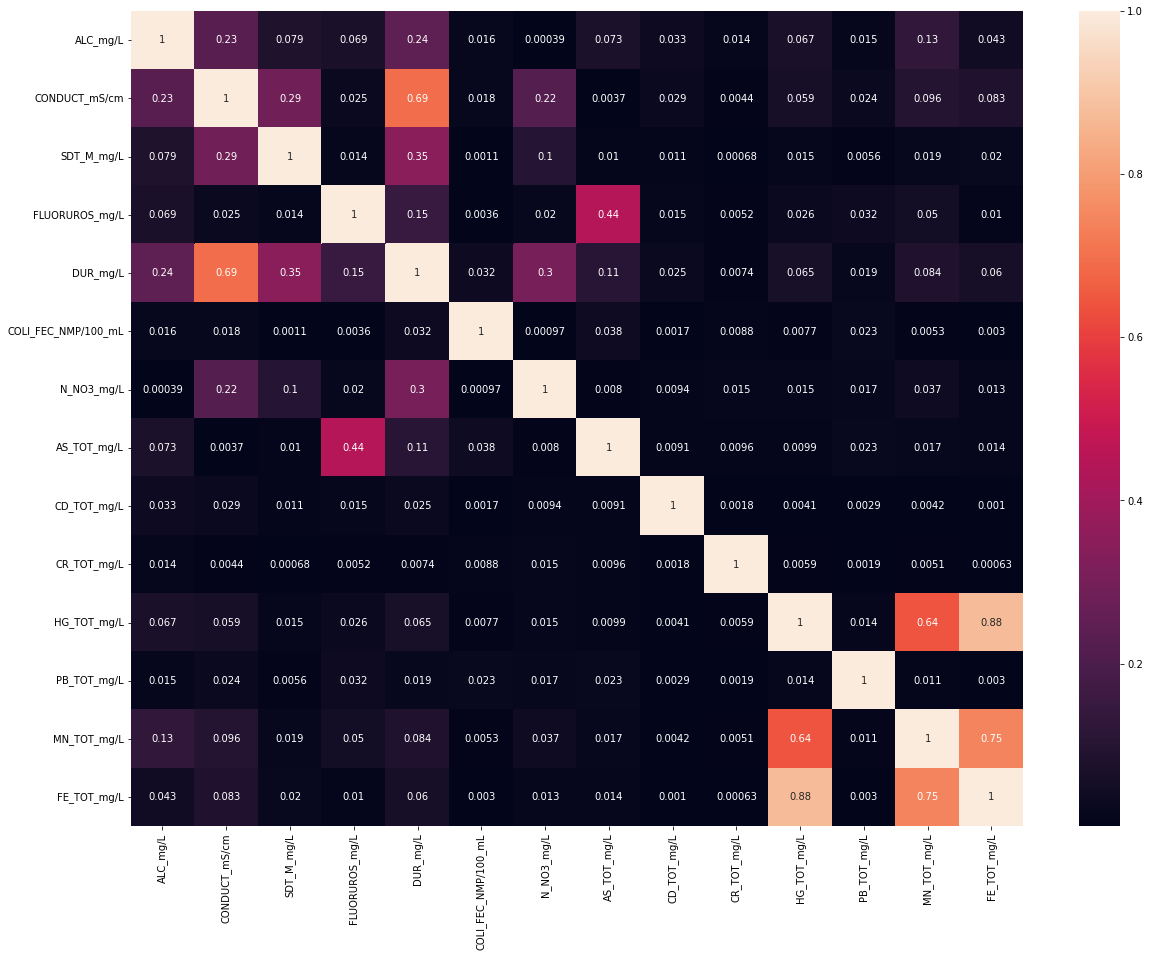

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,15))

sns.heatmap(new_df.corr().abs(), annot=True, cbar='Spectral', ax=ax)


In [82]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1064.0,235.633759,116.874291,26.6400,164.000000,215.527500,292.710000,1650.000000
CONDUCT_mS/cm,1062.0,1138.953013,1245.563674,50.4000,501.750000,815.000000,1322.750000,18577.000000
SDT_M_mg/L,1066.0,896.101567,2751.530590,25.0000,337.500000,550.400000,916.100000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.2000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1067.0,347.938073,359.669452,20.0000,121.194800,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.1000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1067.0,4.319759,8.345134,0.0200,0.650294,2.080932,5.201698,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.0100,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.0030,0.003000,0.003000,0.003000,0.032110
CR_TOT_mg/L,1068.0,0.013276,0.154391,0.0050,0.005000,0.005000,0.005000,5.003200


In [83]:
new_df

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.00150,0.08910
1,231.990,608.0,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.00150,0.02500
2,204.920,532.0,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.00150,0.02500
3,327.000,686.0,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.00150,0.02500
4,309.885,1841.0,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500
1064,256.000,529.0,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.005,0.0005,0.005,0.00709,0.07578
1065,330.690,2600.0,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.005,0.0005,0.005,0.02420,0.21290
1066,193.140,873.0,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.005,0.0005,0.005,0.01200,0.17860


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


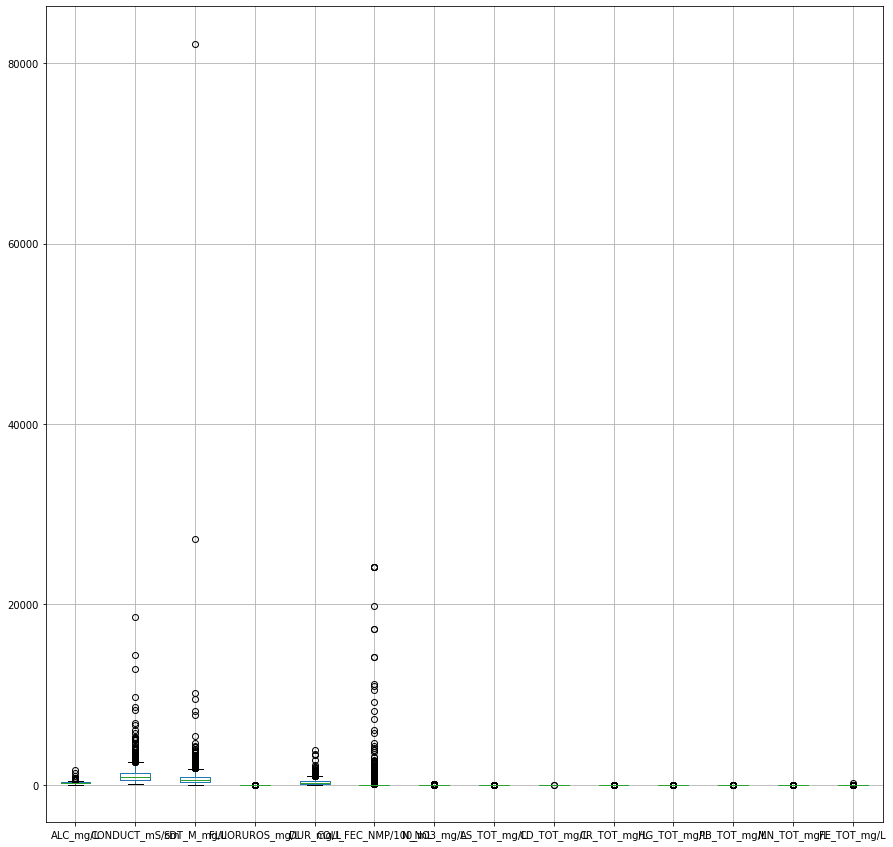

In [84]:
new_df.boxplot(figsize=(15,15))

In [85]:
df_ubicacion = df[['LONGITUD','LATITUD']]
df_ubicacion


,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138
...,...,...
1063,-99.54191,24.76036
1064,-99.70099,24.78280
1065,-99.82249,25.55197
1066,-100.32683,24.80118


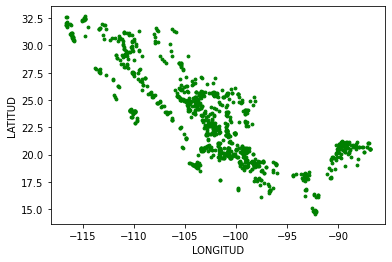

In [86]:
df_ubicacion.plot.scatter('LONGITUD','LATITUD', s=8, c='g')


In [87]:
df_ubicacion
df_ubicacion["COORDENADAS"] = list(zip(df_ubicacion.LONGITUD, df_ubicacion.LATITUD))
df_ubicacion["COORDENADAS"] = df_ubicacion["COORDENADAS"].apply(Point)
df_ubicacion.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


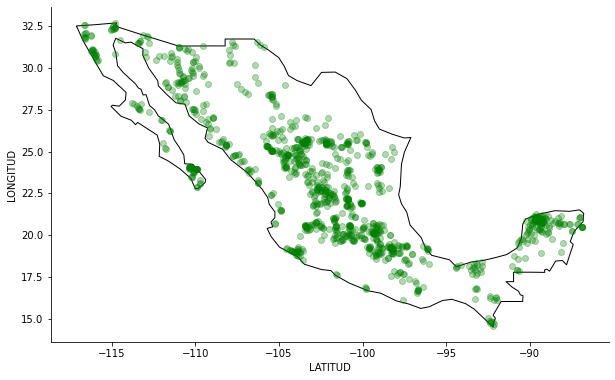

In [88]:
puntos_en_mapa = gpd.GeoDataFrame(df_ubicacion, geometry="COORDENADAS")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

puntos_en_mapa.plot(ax=gax, color='g', alpha = 0.3)
puntos_en_mapa

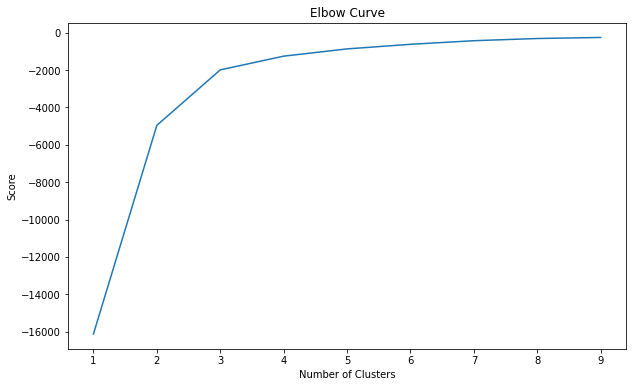

In [89]:
# info por color o ubicacion
from sklearn.cluster import KMeans


numero_de_clusters = range(1,10) 
mi_kmeans = [KMeans(n_clusters=i) for i in numero_de_clusters]
Y_axis = df_ubicacion[['LATITUD']]
X_axis = df_ubicacion[['LONGITUD']]
calculo_kmeans = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]


plt.figure(figsize=(10,6))
plt.plot(numero_de_clusters, calculo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.show()

In [90]:
X = df_sub[['LONGITUD', 'LATITUD']]

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_ 
labels = kmeans.predict(X) 
C = kmeans.cluster_centers_ 

C_DF = pd.DataFrame(C) 
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))  
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) 

puntos_centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
puntos_centroides

,0,1,Coordinates
0,-110.794488,28.438202,POINT (-110.79449 28.43820)
1,-101.722127,22.254226,POINT (-101.72213 22.25423)
2,-90.728470,19.473362,POINT (-90.72847 19.47336)


In [91]:
df_sub['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [92]:
print(y.head())
print(df_ubicacion.head())

  SEMAFORO
0    Verde
1    Verde
2     Rojo
3    Verde
4     Rojo
    LONGITUD   LATITUD                  COORDENADAS
0 -102.02210  22.20887  POINT (-102.02210 22.20887)
1 -102.20075  21.99958  POINT (-102.20075 21.99958)
2 -102.28801  22.36685  POINT (-102.28801 22.36685)
3 -102.29449  22.18435  POINT (-102.29449 22.18435)
4 -110.24480  23.45138  POINT (-110.24480 23.45138)


In [93]:
y['SEMAPHORE'] = y['SEMAFORO'].replace(to_replace = "Verde", value = "green")
y['SEMAPHORE'].replace(to_replace = "Rojo", value = "red", inplace=True)
y['SEMAPHORE'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)
y

,SEMAFORO,SEMAPHORE
0,Verde,green
1,Verde,green
2,Rojo,red
3,Verde,green
4,Rojo,red
...,...,...
1063,Rojo,red
1064,Rojo,red
1065,Rojo,red
1066,Verde,green


In [94]:
puntos_en_mapa['LATITUDYLONGITUD'] = puntos_en_mapa['LATITUD'] + puntos_en_mapa['LONGITUD']
diccionario_semaforo = dict(zip(puntos_en_mapa.LATITUDYLONGITUD, y.SEMAPHORE))
diccionario_semaforo

import folium
lat = puntos_en_mapa.iloc[0]['LATITUD']
lng = puntos_en_mapa.iloc[0]['LONGITUD']
map = folium.Map(location=[lng, lat], zoom_start=1)
for _, row in puntos_en_mapa.iterrows():
    folium.CircleMarker(
        location=[row["LATITUD"], row["LONGITUD"]],
        radius=12, 
        weight=2, 
        fill=True, 
        fill_color=diccionario_semaforo[row["LATITUDYLONGITUD"]],
        color=diccionario_semaforo[row["LATITUDYLONGITUD"]]
    ).add_to(map)
color='black'
for _, row in puntos_en_mapa.iterrows():
    folium.CircleMarker(
        location=[row[1], row[0]],
        radius=12, 
        weight=2, 
        fill=True, 
        fill_color=color,
        color=color
    ).add_to(map)
map